In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../../../DataSets/Google_Stock_Price_Train.csv')

In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


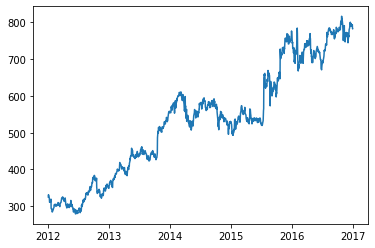

In [4]:
plt.plot(pd.to_datetime(df['Date']),df['Open'])

In [5]:
price = df[['Open']]

In [6]:
New_Data = df[['Open','High', 'Low', 'Volume']]
New_Data

,Open,High,Low,Volume
0,325.25,332.83,324.97,"7,380,500"
1,331.27,333.87,329.08,"5,749,400"
2,329.83,330.75,326.89,"6,590,300"
3,328.34,328.77,323.68,"5,405,900"
4,322.04,322.29,309.46,"11,688,800"
...,...,...,...,...
1253,790.90,792.74,787.28,"623,400"
1254,790.68,797.86,787.66,"789,100"
1255,793.70,794.23,783.20,"1,153,800"
1256,783.33,785.93,778.92,"744,300"


In [7]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Volume  1258 non-null   object 
dtypes: float64(3), object(1)
memory usage: 39.4+ KB


In [8]:
New_Data['Volume'] = New_Data['Volume'].str.replace(",","").astype(float)

#df.loc[row_indexer,column_indexer] s1.loc['c':] .str.replace(",","").astype(float) s1.iloc[:3] = 0

In [9]:
New_Data

,Open,High,Low,Volume
0,325.25,332.83,324.97,7380500.0
1,331.27,333.87,329.08,5749400.0
2,329.83,330.75,326.89,6590300.0
3,328.34,328.77,323.68,5405900.0
4,322.04,322.29,309.46,11688800.0
...,...,...,...,...
1253,790.90,792.74,787.28,623400.0
1254,790.68,797.86,787.66,789100.0
1255,793.70,794.23,783.20,1153800.0
1256,783.33,785.93,778.92,744300.0


In [10]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Volume  1258 non-null   float64
dtypes: float64(4)
memory usage: 39.4 KB


In [11]:
price

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
#scaler = MinMaxScaler()
#price_scaled = scaler.fit_transform(price)

In [21]:
scaler = MinMaxScaler()
New_Data_scaled = scaler.fit_transform(New_Data)
New_Data_scaled.shape

(1258, 4)

In [22]:
#price_scaled.shape

In [23]:
New_Data_scaled.shape

(1258, 4)

In [24]:
'''X = []
for i in range(1198):
    row = price_scaled[i:i+61,0]
    X.append(row)
X = np.array(X)
X.shape'''

'X = []\nfor i in range(1198):\n    row = price_scaled[i:i+61,0]\n    X.append(row)\nX = np.array(X)\nX.shape'

In [26]:
X = []
for i in range(1198):
        row = New_Data_scaled[i:i+61,:]
        X.append(row)
X = np.array(X)
X.shape

(1198, 61, 4)

In [33]:
X_train= X[:,:60]
X_train.shape

(1198, 60, 4)

In [30]:
y_train= X[:,60,0]
y_train.shape

(1198,)

In [31]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [34]:
X_train.shape, y_train.shape

((1198, 60, 4), (1198,))

In [20]:
# X_train = X_train.reshape(1198,60,1)
#X_train = X_train.reshape(1198,60,4)

In [35]:
# Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [36]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(60, 4)))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(1))

model.compile(loss='mean_squared_error')

In [37]:
model.fit(X_train,y_train,epochs=20, batch_size=32)

Epoch 1/20
38/38 [==============================] - 33s 282ms/step - loss: 0.1543
Epoch 2/20
38/38 [==============================] - 9s 233ms/step - loss: 0.0165
Epoch 3/20
38/38 [==============================] - 9s 233ms/step - loss: 0.0172
Epoch 4/20
38/38 [==============================] - 10s 252ms/step - loss: 0.0109
Epoch 5/20
38/38 [==============================] - 10s 256ms/step - loss: 0.0105
Epoch 6/20
38/38 [==============================] - 10s 266ms/step - loss: 0.0072
Epoch 7/20
38/38 [==============================] - 9s 233ms/step - loss: 0.0068
Epoch 8/20
38/38 [==============================] - 9s 235ms/step - loss: 0.0056
Epoch 9/20
38/38 [==============================] - 9s 234ms/step - loss: 0.0066
Epoch 10/20
38/38 [==============================] - 9s 233ms/step - loss: 0.0041
Epoch 11/20
38/38 [==============================] - 9s 234ms/step - loss: 0.0045
Epoch 12/20
38/38 [==============================] - 9s 232ms/step - loss: 0.0046
Epoch 13/20
38/38 [==

# Model Evaluation

In [38]:
df_test = pd.read_csv('../../../DataSets/Google_Stock_Price_Test.csv')
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [39]:
df_test.shape

(20, 6)

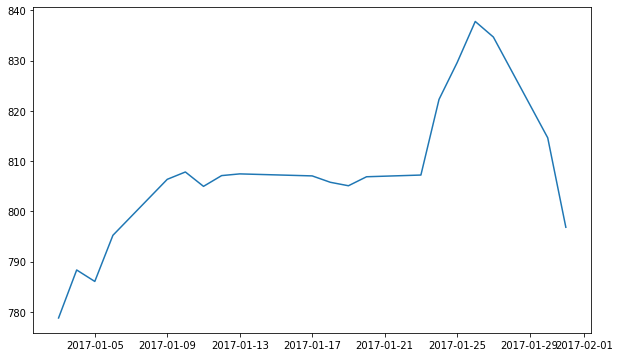

In [40]:
plt.figure(figsize=(10,6))
plt.plot(pd.to_datetime(df_test['Date']),df_test['Open'])

In [41]:
df[['Open']].iloc[-60:]

,Open
1198,779.00
1199,779.66
1200,777.71
1201,786.66
1202,783.76
1203,781.22
1204,781.65
1205,779.80
1206,787.85
1207,798.24


In [42]:
#test_data = pd.concat([df[['Open']].iloc[-60:], df_test[['Open']]])
test_data = pd.concat([df[['Open','High', 'Low', 'Volume']].iloc[-60:], df_test[['Open','High', 'Low', 'Volume']]])

In [43]:
test_data

,Open,High,Low,Volume
1198,779.00,780.48,775.54,"1,070,700"
1199,779.66,779.66,770.75,"933,200"
1200,777.71,789.38,775.87,"1,174,900"
1201,786.66,792.28,780.58,"1,372,500"
1202,783.76,788.13,782.06,"937,400"
...,...,...,...,...
15,829.62,835.77,825.06,"1,494,500"
16,837.81,838.00,827.01,"2,973,900"
17,834.71,841.95,820.44,"2,965,800"
18,814.66,815.84,799.80,"3,246,600"


In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 1198 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    80 non-null     float64
 1   High    80 non-null     float64
 2   Low     80 non-null     float64
 3   Volume  80 non-null     object 
dtypes: float64(3), object(1)
memory usage: 3.1+ KB


In [46]:
test_data['Volume'] = test_data['Volume'].str.replace(",","").astype(float)
test_data

,Open,High,Low,Volume
1198,779.00,780.48,775.54,1070700.0
1199,779.66,779.66,770.75,933200.0
1200,777.71,789.38,775.87,1174900.0
1201,786.66,792.28,780.58,1372500.0
1202,783.76,788.13,782.06,937400.0
...,...,...,...,...
15,829.62,835.77,825.06,1494500.0
16,837.81,838.00,827.01,2973900.0
17,834.71,841.95,820.44,2965800.0
18,814.66,815.84,799.80,3246600.0


In [47]:
test_data.shape

(80, 4)

In [49]:
test_scaled = scaler.transform(test_data)

In [50]:
test_scaled.shape

(80, 4)

In [51]:
X = []
for i in range(20):
        row = test_scaled[i:i+61,:]
        X.append(row)
X = np.array(X)
X.shape

(20, 61, 4)

In [54]:
X_test = X[:,:60]
X_test.shape


(20, 60, 4)

In [55]:
yp = model.predict(X_test)

1/1 [==============================] - 5s 5s/step


In [42]:
yp

array([[0.9347501 ],
       [0.9361749 ],
       [0.93777776],
       [0.9394733 ],
       [0.94078326],
       [0.9428072 ],
       [0.9442892 ],
       [0.94542223],
       [0.94635177],
       [0.94824743],
       [0.9490293 ],
       [0.949683  ],
       [0.950505  ],
       [0.95212394],
       [0.95214844],
       [0.9522932 ],
       [0.9530971 ],
       [0.954453  ],
       [0.9542106 ],
       [0.95402646]], dtype=float32)

In [56]:
scaler_2 = MinMaxScaler()
scaler_2.fit(df[['Open']])


MinMaxScaler()

In [57]:
yp_unscaled= scaler_2.inverse_transform(yp)

In [58]:
yp_unscaled

array([[800.8425 ],
       [799.32764],
       [800.0338 ],
       [802.0127 ],
       [805.5715 ],
       [810.37366],
       [814.4214 ],
       [816.3732 ],
       [816.5271 ],
       [816.5785 ],
       [816.08594],
       [815.3783 ],
       [815.0876 ],
       [815.09564],
       [816.0838 ],
       [819.4346 ],
       [824.45526],
       [829.1612 ],
       [831.62317],
       [828.412  ]], dtype=float32)

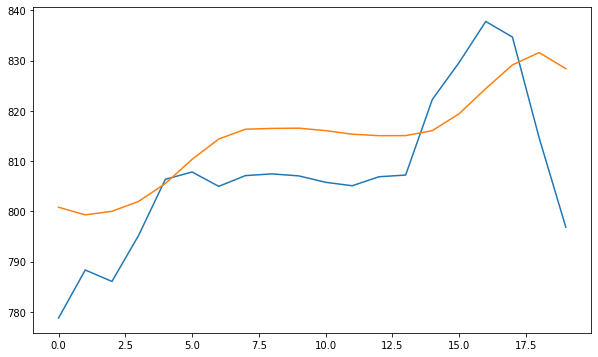

In [62]:
plt.figure(figsize=(10,6))
plt.plot(df_test['Open'],)
plt.plot(yp_unscaled)
